
### 使用Pytorch编写神经网络，完成boston房价预测问题

#### 思路:
1. 数据预处理
    - 数据加载及预览
    - 数据预规范化
    - 数据转化(numpy-->torch)
    - 数据切分训练集及测试集
2. 编写神经网络
    - 定义网络结构
    - 初始化模型参数
    - 循环: 1)前向传播, 2)计算损失函数, 3) 清空梯度(pytorch特有), 4)反向传播, 5)权值更新
3. 写成函数, 方便传不同参数, 查看结果

In [3]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import torch

In [4]:
#定义一个数据预处理函数
def data_preprocessing(data):
    X = data['data'] 
    y = data['target']

    print("数据量:", X.shape[0], "特征数量:", X.shape[1])

    #数据规范化
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler() #使用归一化进行数据规范
    X_scaled = scaler.fit_transform(X)

    #数据转化
    X_scaled = torch.from_numpy(X_scaled).type(torch.FloatTensor)
    y = torch.from_numpy(y).type(torch.FloatTensor)

    #切分训练集和测试集
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 29)

    return X_train, X_test, y_train, y_test


In [5]:
#定义一个神经网络的函数, 方便传不同参数 去看结果
def nn_prediction (n_h, l_rate, max_epoch, X_train, X_test, y_train, y_test, model = None):
    from torch import nn

    n_f = X_train.shape[1]

    if model == None:
        model = nn.Sequential(
                nn.Linear(n_f, n_h),
                nn.ReLU(), #使用relu作为激活函数
                nn.Linear(n_h, 1) #激活函数到输出函数1层
                )

    #定义损失函数 和优化器
    loss_function  = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = l_rate) #使用'集大成者'的Adam作为优化器

    #训练循环(使用train数据): 前向传播, 计算损失函数, 清空梯度, 反向传播, 权重更新

    loss_array = []
    for i in range(max_epoch):
        #前向传播
        y_pred = model(X_train) #使用X_train
        #计算loss
        loss = loss_function(y_pred, y_train) #计算预测值与y_train的MSE
        loss_array.append(loss) #保存每次的loss
        # print(i, loss.item())

        #梯度清零
        optimizer.zero_grad() #pytorch特有, 否则梯度会累加,影响学习
        #反向传播
        loss.backward()
        #权重调整
        optimizer.step()
    

    #测试: 使用测试集
    result = model(X_test)
    predict_ls = result.detach().numpy() #数据是torch的tensor格式, 需要转化成numpy
    # print("预估结果:, \n",predict_ls) 

    #评估预测值与实际值的MSE
    loss_test = loss_function(result, y_test)
    print('训练集最优MSE: %0.2f' % min(loss_array))
    print('测试集的MSE: %.02f' % loss_test.item())

    
    plt.rcParams['figure.figsize'] = (12,6)

    #绘制loss曲线
    ax1 = plt.subplot(1,2,1)
    x = np.arange(max_epoch)
    y = np.array(loss_array)

    ax1.plot(x, y)
    plt.title('Loss Value in all iterations')
    plt.xlabel('iteration')
    plt.ylabel('loss value')
    
    #绘制散点图: y1预测值 与y2实际值的关系
    ax2 = plt.subplot(1,2,2)
    x = np.arange(X_test.shape[0])
    y1 = np.array(predict_ls) #预测值
    y2 = np.array(y_test) #实际值

    line1 = ax2.scatter(x, y1, c = 'red')
    line2 = ax2.scatter(x, y2, c= 'green')

    plt.legend([line1, line2],['predit','real'])
    plt.title('boston house price')
    plt.ylabel('price')

    return predict_ls
    


In [6]:
#加载数据
data = load_boston()
X_train, X_test, y_train, y_test = data_preprocessing(data)

数据量: 506 特征数量: 13


训练集最优MSE: 92.34
测试集的MSE: 73.62


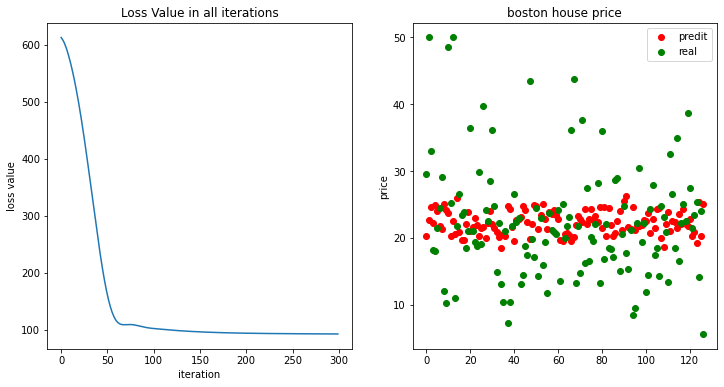

In [7]:
#定义参数test1
n_h = 10 # 隐藏层维度, 自己定义, 10
l_rate = 0.01 #学习率, 常见0.01 或者0.001
max_epoch = 300 #最大迭代次数

#输出结果
predict_ls = nn_prediction ( n_h, l_rate, max_epoch,X_train, X_test, y_train, y_test)
# print(predict_ls)

训练集最优MSE: 90.24
测试集的MSE: 72.18


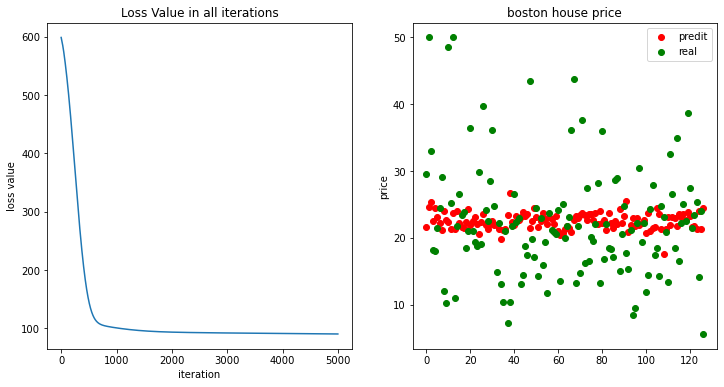

In [8]:
#定义参数test2 : 修改learning Rate&迭代次数
n_h = 10 # 隐藏层维度, 自己定义, 10
l_rate = 0.001 #学习率, 常见0.01 或者0.001
max_epoch = 5000 #最大迭代次数

#输出结果
predict_ls = nn_prediction ( n_h, l_rate, max_epoch,X_train, X_test, y_train, y_test)
# print(predict_ls)

训练集最优MSE: 89.02
测试集的MSE: 70.73
Wall time: 16.9 s


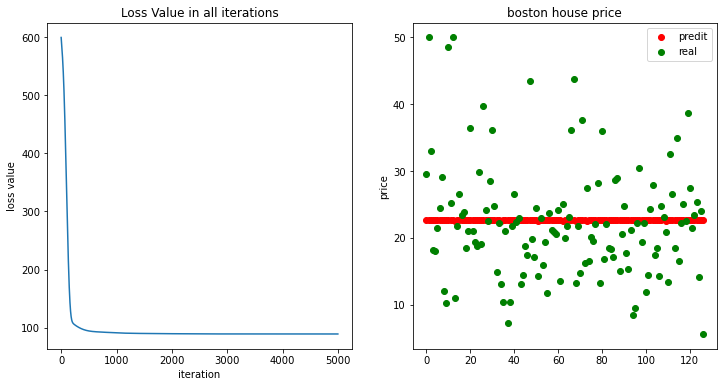

In [9]:
%%time
#定义参数test3: 在test2基础上,增加隐藏层维度
n_h = 100 # 隐藏层维度, 自己定义, 10
l_rate = 0.001 #学习率, 常见0.01 或者0.001
max_epoch = 5000 #最大迭代次数

#输出结果
predict_ls = nn_prediction ( n_h, l_rate, max_epoch,X_train, X_test, y_train, y_test)
# print(predict_ls)

训练集最优MSE: 89.02
测试集的MSE: 70.73
Wall time: 16.8 s


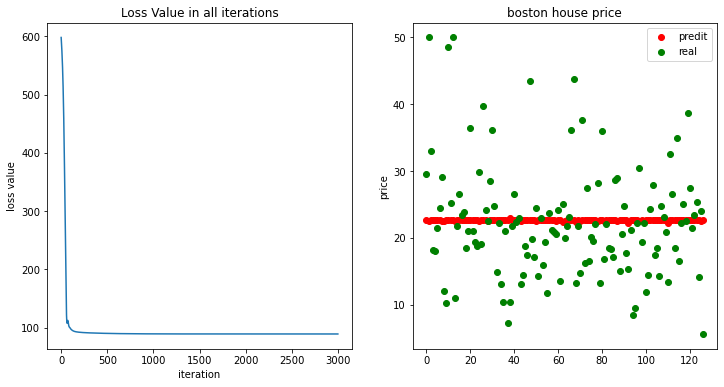

In [12]:
 %%time
 
#定义参数test4: 在test3基础上,增加隐藏层的层数

#定义model, 增加多1层隐藏层
from torch import nn
model = nn.Sequential(
            nn.Linear(X_train.shape[1], 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1) #最后一层到输出层
            )
n_h = 10 # 隐藏层维度, 自己定义, (已经定义了model, 此参数其实没有用上)
l_rate = 0.001 #学习率, 常见0.01 或者0.001
max_epoch = 3000 #最大迭代次数

#输出结果
predict_ls = nn_prediction ( n_h, l_rate, max_epoch,X_train, X_test, y_train, y_test, model)
# print(predict_ls)

训练集最优MSE: 89.02
测试集的MSE: 70.73
Wall time: 32.5 s


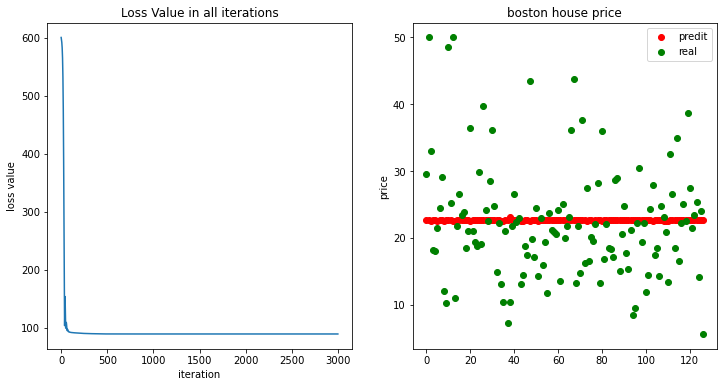

In [13]:
 %%time
 
#定义参数test5: 在test4基础上,增加隐藏层的层数

#定义model, 再增加2层隐藏层
 model = nn.Sequential(
            nn.Linear(X_train.shape[1], 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1) #最后一层到输出层
            )
n_h = 10 # 隐藏层维度, 自己定义, (已经定义了model, 此参数其实没有用上)
l_rate = 0.001 #学习率, 常见0.01 或者0.001
max_epoch = 3000 #最大迭代次数

#输出结果
predict_ls = nn_prediction ( n_h, l_rate, max_epoch,X_train, X_test, y_train, y_test, model)
# print(predict_ls)

### thinking conclusion
- 隐藏层维度增加,隐藏层层数增加, 都有助于降低MSE
    - 耗时增加
- learning Rate越小, 迭代次数需要越多, 以便能让趋近MSE最优且不变
    - 在隐藏层层数不变的情况下, l_r = 0.001 搭配max_epoch = 500, 效果很差, 只有调整到5000, 才能降低MSE
    - 增加1层隐藏层, l_r = 0.001 搭配max_epoch = 3000, 效果跟5000次迭代相当
- 在test4的基础上, 增加隐藏层,增加max_epoch, 效果没有太多变化. 测试集最优MSE70.74